In [1]:
from sklearn.decomposition import PCA
from hdimvis.algorithms.stochastic_ntet_algo.SNeD import SNeD
from hdimvis.create_low_d_layout.LowDLayoutCreation import LowDLayoutCreation
from hdimvis.data_fetchers.DataFetcher import DataFetcher
from hdimvis.visualise_layouts_and_metrics.plot import show_layouts, show_generation_metrics
from hdimvis.metrics.distance_measures.relative_rbf_dists import relative_rbf_dists
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from hdimvis.algorithms.stochastic_ntet_algo.SNeD import SNeD
from hdimvis.create_low_d_layout.LowDLayoutCreation import LowDLayoutCreation
from hdimvis.data_fetchers.DataFetcher import DataFetcher
from hdimvis.visualise_layouts_and_metrics.plot import show_layouts, show_generation_metrics
from hdimvis.metrics.distance_measures.euclidian_and_manhattan import manhattan
from experiments.cube.Cube import Cube

In [2]:


cube = Cube(num_points=100, side=30, angle=0.4)
dataset_cube= cube.get_sample_dataset(3000)


metric_collection = {'Average quartet stress': 5}
dataset = DataFetcher.fetch_data('rna N3k')

Xld = PCA(n_components=2, whiten=False, copy=True).fit_transform(dataset.data).astype(np.float64)
Xld *= 10/np.std(Xld)

squad = SNeD(dataset=dataset_cube, initial_layout=Xld, use_nesterovs_momentum=False, ntet_size=4,  )
layout = LowDLayoutCreation().create_layout(squad, optional_metric_collection=metric_collection, no_iters=1000)


####################
Fetching the "rna N3k" dataset
####################
Dataset loaded
Dataset shape: (3000, 50)
####################
####################
A 2D layout of the "3d cube of 30^3 points - 3000 points sampled" dataset will be created 
using the "Stochastic N-tet Descent MDS" algorithm
####################
The HD distance measure used is: euclidean
####################
 "N-tet" size: 4
####################
"Average quartet stress" will be measured every 5 iterations
####################
All stress calculations will be performed using the euclidian norm
####################


{'Stress': ([], []), 'Average quartet stress': ([0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100, 105, 110, 115, 120, 125, 130, 135, 140, 145, 150, 155, 160, 165, 170, 175, 180, 185, 190, 195, 200, 205, 210, 215, 220, 225, 230, 235, 240, 245, 250, 255, 260, 265, 270, 275, 280, 285, 290, 295, 300, 305, 310, 315, 320, 325, 330, 335, 340, 345, 350, 355, 360, 365, 370, 375, 380, 385, 390, 395, 400, 405, 410, 415, 420, 425, 430, 435, 440, 445, 450, 455, 460, 465, 470, 475, 480, 485, 490, 495, 500, 505, 510, 515, 520, 525, 530, 535, 540, 545, 550, 555, 560, 565, 570, 575, 580, 585, 590, 595, 600, 605, 610, 615, 620, 625, 630, 635, 640, 645, 650, 655, 660, 665, 670, 675, 680, 685, 690, 695, 700, 705, 710, 715, 720, 725, 730, 735, 740, 745, 750, 755, 760, 765, 770, 775, 780, 785, 790, 795, 800, 805, 810, 815, 820, 825, 830, 835, 840, 845, 850, 855, 860, 865, 870, 875, 880, 885, 890, 895, 900, 905, 910, 915, 920, 925, 930, 935, 940, 945, 950, 955, 960, 965, 970

C:\Users\Owner\Desktop\2095736w\hdimvis\visualise_layouts_and_metrics\plot.py:68: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  axis.scatter(x, y, alpha=alpha, s=size, c=colors, cmap=cmap)


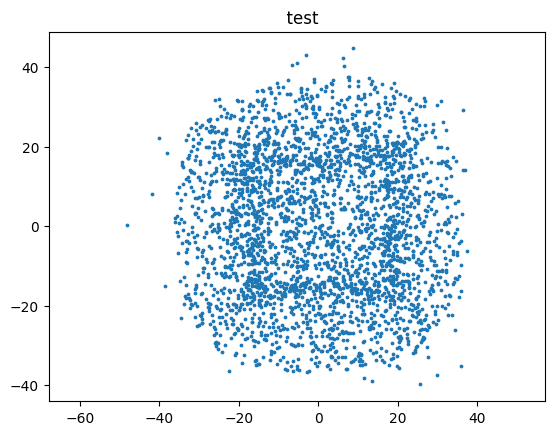

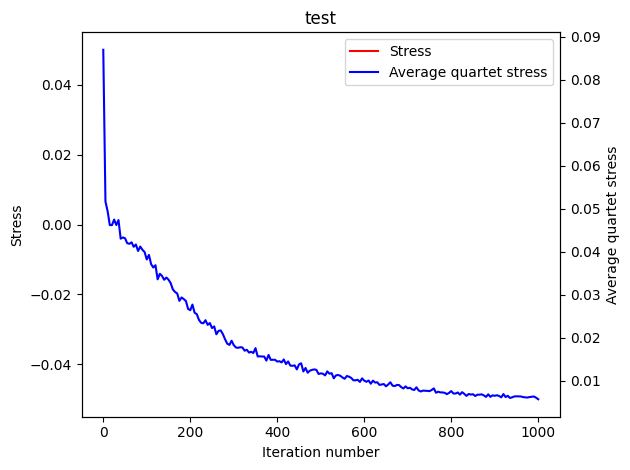

In [3]:
print(layout.collected_metrics)
show_layouts(layout, use_labels=True, color_map='rainbow', title="  test")
show_generation_metrics(layout, quartet_stress=True, title="test")
